In [27]:
# Si lo ejecutas desde google colab
# from google.colab import drive
# import os
# drive.mount('/content/drive')
# %cd /content/drive/My Drive/Curso\ Actual/4ac/notebooks
# !pwd
# #os.chdir('/content/drive/Curso Actual')



In [28]:
# Importamos librerías
#from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import pandas as pd #this is how I usually import pandas
#import matplotlib #only needed to determine Matplotlib version number
import numpy as np

# Enable inline plotting
%matplotlib inline



import imgkit

# Función para analizar un dataframe

def analisis_df(df, txt_intro ="Tenemos los siguientes datos: \n " \
                ,txt_mejor="\n * Sube {}:", txt_peor="\n * **Baja** {}:", \
                txt_igual="\n * Se mantiene {}:", solo_diferencias=False, \
                modo=1) :
    # analiza los datos de un dataframe donde en el indice están las evaluaciones y en las columnas los items a analizar
    if max(df.index)  > 1 :
        ix = list(df.index).index(ultima_evaluacion)
        txt = txt_intro
        for c in range(len(df.columns)) :
            if (df.iloc[ix,c] - df.iloc[ix-1,c]) > 0 : txt2 = txt_mejor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df.iloc[ix-1,c]),str(df.iloc[ix,c]))
            elif (df.iloc[ix,c] - df.iloc[ix-1,c]) < 0 : txt2 = txt_peor.format(df[df.columns[c]].name)+" Pasa de {} a {}. ".format(str(df.iloc[ix-1,c]),str(df.iloc[ix,c]))
            elif (solo_diferencias) : txt2=""
            else : txt2 = txt_igual.format(df[df.columns[c]].name)+" {}. ".format(str(df.iloc[ix,c]))              
            txt += txt2        
    else :
        txt = txt_intro
        if modo ==1 :
            txt += ", ".join(["**{}** es {}".format(df[df.columns[c]].name,str(df.iloc[0,c])) for c in range(len(df.columns))])
        elif modo == 2 :
            txt += " ".join(["\n* **{}**: {}".format(df[df.columns[c]].name,str(df.iloc[0,c])) for c in range(len(df.columns))])+" \n "
        else :
            txt += ", ".join(["**{}**: {}".format(df[df.columns[c]].name,str(df.iloc[0,c])) for c in range(len(df.columns))])+" \n "
    return txt+" \n ", [df[df.columns[i]] for i in range(len(df.columns))]
    


# Funciones para estilo

def color_negative_red(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: lightyellow'
    return 'color: %s ; font-size: 20px ; font-weight: bold' % color 

def color_media(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val < 5 or val =="") else 'black; background: burlywood'
    return 'color: %s ; font-size: 14px ; font-weight: bold'  % color 

def color_suspensos(val):
    """
    Takes a scalar and returns a string with
    the css property `'color: red'` for negative
    strings, black otherwise.
    """
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        color = 'red; background: gold' if (val > 0 or val =="") else 'black; background: darkkhaki'
        
    return 'color: %s ; font-weight: bold ; font-size: 14px' % color 

def evaluaciones_anteriores(val):      
    if type(val)== str:
        color = 'blue ; background: azure'
    else:
        #color = 'red; background: khaki' if (val < 5 or val =="") else 'green; background: ghostwhite'
        color = 'blue ; background: azure'
    
    return 'color: %s ; font-size: 16px ; font-weight: bold' % color 

In [29]:
# Importamos los datos

evaluaciones_a_incluir = 1

inicio_nombre_fichero = 'importado'

def actilla(fich='importado2', eval=2):
    fichero = fich + '.csv'
    pre_actilla = pd.read_csv(fichero, index_col=False, encoding='utf-8')
    pre_actilla = pre_actilla.drop([col for col in pre_actilla if col.startswith('Unna')], axis=1)
    pre_actilla = pre_actilla.drop("Nº MNS", axis = 1)
    pre_actilla = pd.melt(pre_actilla, id_vars=["Nº","Apellidos, Nombre"], var_name="Asignatura", value_name="Nota")
    pre_actilla = pre_actilla[pre_actilla['Nota'].notna()]
    pre_actilla = pre_actilla.copy()
    pre_actilla['Eval'] = eval
    pre_actilla.Asignatura=pre_actilla.Asignatura.str.replace('\n', ' ')
    return pre_actilla
    

def concatenar_actillas(inicio_nombre_fichero='importado', evaluaciones_a_incluir=2): 
    return pd.concat([actilla(inicio_nombre_fichero + str(n + 1), n + 1) for n in range(evaluaciones_a_incluir)])

actilla_final = concatenar_actillas(inicio_nombre_fichero,evaluaciones_a_incluir)
actilla_final = actilla_final.rename(columns={'Apellidos, Nombre':'Alumno'})
actilla_final = actilla_final[['Alumno','Asignatura','Eval','Nota']]
actilla_final['Suspenso']=0

# Si sale algún no presentado hay que ejecutar lo siguiente
#actilla_final = actilla_final.drop(actilla_final[actilla_final.Nota == 'NP'].index)

actilla_final.Nota = pd.to_numeric(actilla_final.Nota)
actilla_final.loc[actilla_final['Nota'] < 5, 'Suspenso'] = 1
actilla_final.Nota = actilla_final.Nota.astype(int)

ultima_evaluacion = actilla_final.Eval.max()


actilla_final=actilla_final[actilla_final.Eval <= evaluaciones_a_incluir].sort_values('Alumno', ascending=True)
actilla_final.to_csv('ev{}.csv'.format(evaluaciones_a_incluir),index=False)
actilla_final

,Alumno,Asignatura,Eval,Nota,Suspenso
0,Alumno_1,2FR II,1,8,0
44,Alumno_1,QU,1,6,0
4,Alumno_1,BI,1,7,0
40,Alumno_1,PSC,1,8,0
32,Alumno_1,MA2,1,7,0
8,Alumno_1,CTM,1,7,0
28,Alumno_1,LC2,1,6,0
24,Alumno_1,IN II,1,10,0
20,Alumno_1,HE,1,5,0
45,Alumno_2,QU,1,9,0


In [30]:
actilla_final[['Alumno','Asignatura']].groupby('Alumno').count().sort_values(['Alumno']).rename(columns={'Asignatura':'Observaciones'}).to_csv("alumnos_observaciones_n.csv",encoding='utf_8')

obser = pd.read_csv('alumnos_observaciones_n.csv', index_col=False)
obser = obser[obser.Observaciones.notna()]
obser

,Alumno,Observaciones
0,Alumno_1,9
1,Alumno_2,8
2,Alumno_3,8
3,Alumno_4,8


In [31]:
import unidecode
actilla_final[['Alumno','Asignatura']].groupby('Alumno').count().sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col]).rename(columns={'Asignatura':'Observaciones'})

,Observaciones
Alumno,
Alumno_1,9
Alumno_2,8
Alumno_3,8
Alumno_4,8


In [32]:
#actilla_final[['Alumno','Asignatura']].groupby('Alumno').count().rename(columns={'Asignatura':'Observaciones'}).to_csv("alumnos_observaciones.csv",encoding='utf-8')


# Tiene que existir el fichero

obser = pd.read_csv('alumnos_observaciones{}.csv'.format(ultima_evaluacion), index_col=False)
obser = obser[obser.Observaciones.notna()]
obser

,Alumno,Observaciones
0,Alumno_1,Aquí irían las observaciones del alumno 1
1,Alumno_2,Aquí irían las observaciones del alumno 2
2,Alumno_3,Aquí irían las observaciones del alumno 3
3,Alumno_4,Aquí irían las observaciones del alumno 4


In [33]:
###### Informe sábana (df5 y actilla_estilada)


#df = actilla_final[actilla_final.Eval <= ultima_evaluacion]
df = actilla_final[actilla_final.Eval.isin([ultima_evaluacion, ultima_evaluacion -1])]

df1 = df.set_index(['Alumno','Asignatura','Eval']).Nota.astype(int).unstack('Asignatura').unstack('Eval').sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col])
df2=actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Nota']].mean().unstack('Eval').sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col]).rename(columns={'Nota':'NM'})
df3 = df.groupby(['Asignatura','Eval'])[['Nota']].mean()

df4 = pd.concat([df1,df3.T.rename(index={'Nota': 'Media'})])

# #calculamos el número de suspensos por asignatura y porcentaje

df7=df.groupby(['Asignatura','Eval'])[['Suspenso']].aggregate(['sum','count'])
df7[('Suspenso','porc')]=df7[('Suspenso','sum')]/df7[('Suspenso','count')]
df7.columns=df7.columns.get_level_values(1)
df7.T

df4 = pd.concat([df4,df7[['sum','porc']].T.rename(index={'sum':'nsusp','porc':'%'})], sort=False)

df5 = pd.concat([df4,df2], axis=1, sort=False)
df6 = actilla_final[actilla_final.Eval == ultima_evaluacion].groupby(['Alumno','Eval'])[['Suspenso']].sum().unstack('Eval').sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col]).rename(columns={'Suspenso':'MNS'})
df5 = pd.concat([df5,df6], axis=1, sort=False)


# # calculamos la media de las medias de las notas y la suma total de suspensos
df5.iloc[-3:-2,-2:-1]=df2.mean()[0]
df5.iloc[-2:-1,-1:]=df6.sum()[0]

# le damos estilo

actilla_estilada = df5.style.set_precision(0) \
    .format("{:.0%}",subset=(df5.index[-1:],df5.columns[:-2])) \
    .format("{:.0f}",subset=(df5.index[-2:-1],df5.columns[:-2])) \
    .format("{:.1f}",subset=(df5.index[-3:-2],df5.columns[:-2])) \
    .format("{:.1f}",subset=(df5.index,df5.columns[-2:-1])) \
    .format("{:.0f}",subset=(df5.index,df5.columns[-1:0])) \
    .set_table_styles([{'selector': 'td','props': [('border', '1px solid black'),('text-align', 'center')]}, \
                       {'selector': 'tr','props': [('border', '1px solid black')]}, \
                       {'selector': 'th','props': [('border', '1px solid black'),('text-align', 'center'),('font-size','13px')]}, \
                      ] \
                     ) \
    .applymap(color_negative_red, subset=(df5.index[:-3],df5.columns[:-2])).highlight_null("white") \
    .applymap(color_media, subset=(df5.index[-3:-2],df5.columns)) \
    .applymap(evaluaciones_anteriores, subset=(df5.index[-2:],df5.columns[:])) \
    .applymap(color_media, subset=(df5.index[:-3],['NM'])) \
    .applymap(color_suspensos, subset=(df5.index[:-3],['MNS'])) \
    .applymap(evaluaciones_anteriores, subset=(df5.index,df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \
    .set_na_rep('-')
df5

#                      {'selector': 'th','props': [('border', '1px solid black'),('text-align', 'center'),('font-size','20px')]}
 
#    .set_table_styles([{'selector': 'td','props': [('border-collapse', 'collapse'),('text-align', 'center')]}, \

#     .applymap(color_media, subset=(df5.index,['NM'])) \
#     .applymap(color_suspensos, subset=(df5.index,['MNS'])) \
#     .applymap(color_media, subset=(df5.index[-3:-2],df5.columns[:-2])) \
#     .applymap(color_suspensos, subset=(df5.index[-2:-2],df5.columns[:-2])) \
#     .applymap(evaluaciones_anteriores, subset=(df5.index[-3:],df5.columns[df5.columns.get_level_values(1) != ultima_evaluacion])) \



df1

Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,PS,PSC,QU
Eval,1,1,1,1,1,1,1,1,1,1
Alumno,,,,,,,,,,
Alumno_1,8.0,7.0,7.0,5.0,10.0,6.0,7.0,NaN,8.0,6.0
Alumno_2,7.0,8.0,9.0,7.0,9.0,7.0,9.0,NaN,NaN,9.0
Alumno_3,8.0,7.0,9.0,6.0,9.0,7.0,7.0,NaN,NaN,6.0
Alumno_4,NaN,7.0,8.0,3.0,7.0,7.0,10.0,8.0,NaN,7.0


In [34]:
df = actilla_final[actilla_final.Eval.isin([ultima_evaluacion, ultima_evaluacion -1])]
df1 = df.set_index(['Alumno','Asignatura','Eval']).Nota.astype(int).unstack('Asignatura').unstack('Eval').sort_values(by='Alumno', key=lambda col: [unidecode.unidecode(i) for i in col])
df1

Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,PS,PSC,QU
Eval,1,1,1,1,1,1,1,1,1,1
Alumno,,,,,,,,,,
Alumno_1,8.0,7.0,7.0,5.0,10.0,6.0,7.0,NaN,8.0,6.0
Alumno_2,7.0,8.0,9.0,7.0,9.0,7.0,9.0,NaN,NaN,9.0
Alumno_3,8.0,7.0,9.0,6.0,9.0,7.0,7.0,NaN,NaN,6.0
Alumno_4,NaN,7.0,8.0,3.0,7.0,7.0,10.0,8.0,NaN,7.0


In [35]:
# actilla estilada a fichero html
html='<meta charset="UTF-8">'+actilla_estilada.render()
f=open('actilla_{}ªev.html'.format(ultima_evaluacion),'w')
f.write(html)
f.close()

# actilla estilada a imagen

imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}ev.svg'.format(ultima_evaluacion), options = {'format':'svg','zoom':'0.4'})
imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}ev.png'.format(ultima_evaluacion), options = {'format':'png','zoom':'0.8'})

actilla_estilada

Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               
Loading page (1/2)
Rendering (2/2)                                                    
Done                                                               


Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,PS,PSC,QU,NM,MNS
Eval,1,1,1,1,1,1,1,1,1,1,1,1
Alumno_1,8,7,7,5,10,6,7,-,8,6,7.1,0
Alumno_2,7,8,9,7,9,7,9,-,-,9,8.1,0
Alumno_3,8,7,9,6,9,7,7,-,-,6,7.4,0
Alumno_4,-,7,8,3,7,7,10,8,-,7,7.1,1
Media,7.7,7.2,8.2,5.2,8.8,6.8,8.2,8.0,8.0,7.0,7.4,-
nsusp,0,0,0,1,0,0,0,0,0,0,nan,1
%,0%,0%,0%,25%,0%,0%,0%,0%,0%,0%,nan,-


In [36]:
au = "IES Pedro Cerrada"
da = "4ºESO H"
f = open("acta_{}ev.md".format(ultima_evaluacion), "w")
texto = """---
title: "Acta de la {}ª evaluación" 
author: {}
date: {}
titlepage: true
logo: portada
geometry: landscape,margin=1in
keywords: [Acta]
... \n""".format(ultima_evaluacion, au, da)

texto += "# Acta de la {}ª evaluación \n\n \\newpage![](actilla_{}ev.png) \n\n## Resultados generales: \n".format(ultima_evaluacion, ultima_evaluacion)

f3 = open("acta2_{}ev.md".format(ultima_evaluacion), "w")



f2 = open("resumen_{}ev.md".format(ultima_evaluacion), "w")
texto2 = """---
title: "Estadísticas {}ªev." 
author: {}
date: {}
titlepage: true
logo: portada
geometry: margin=1in, landscape
keywords: [Resumen]
...\n""".format(ultima_evaluacion, au, da)

In [37]:
df = actilla_final.groupby(['Eval'])[['Alumno','Nota','Suspenso']].aggregate({'Alumno':'nunique','Nota':'mean','Suspenso':'sum'}).rename(columns={'Alumno':'N_al', 'Nota':'Media', 'Suspenso':'N_susp'})
df['Susp_alu']=(df['N_susp']/df['N_al']).round(2)
df['Media']=df['Media'].round(2)
display(df)

df2 = df.rename(columns={'N_al':'número de alumnos', 'Media':'nota media', 'N_susp':'número de suspensos','Susp_alu':'número de suspensos por alumno'}).iloc[:,1:]
display(df2)

#texto += "\n\n### Resumen \n"
#texto += "\n  {}  \n".format(df.to_markdown())
texto += analisis_df(df2, txt_intro ="A nivel de grupo, se tienen los siguientes datos: \n ", modo=2)[0] 
texto2 += analisis_df(df2, txt_intro ="A nivel de grupo, se tienen los siguientes datos: \n ", modo=2)[0] 

analisis_df(df2,txt_intro="A nivel de grupo, se tienen los siguientes datos: \n ", modo=2)[0]

#analisis_df??

,N_al,Media,N_susp,Susp_alu
Eval,,,,
1,4,7.42,1,0.25


,nota media,número de suspensos,número de suspensos por alumno
Eval,,,
1,7.42,1,0.25


'A nivel de grupo, se tienen los siguientes datos: \n \n* **nota media**: 7.42 \n* **número de suspensos**: 1 \n* **número de suspensos por alumno**: 0.25 \n  \n '

''

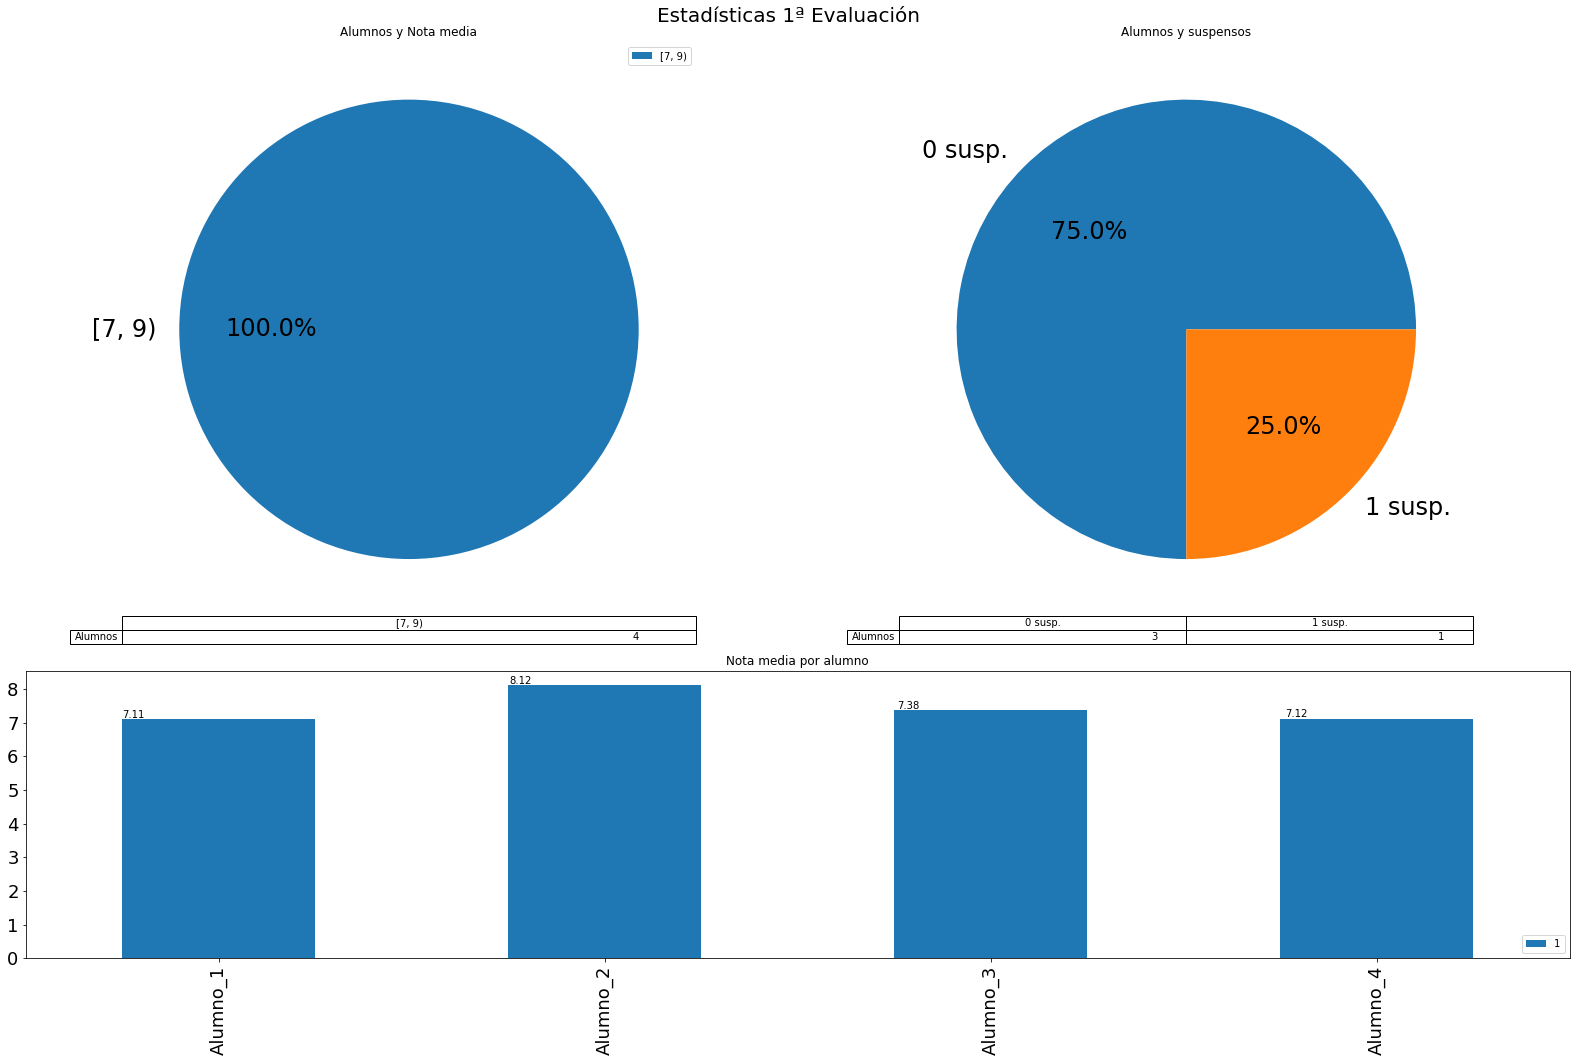

In [38]:
fig = plt.figure(figsize=(22,15))
fig.suptitle('Estadísticas {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=2, ncols=2, height_ratios=[2, 1])

ax0 = fig.add_subplot(gs[1, :])
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g3=df.plot.bar(title='Nota media por alumno',ax=ax0, xlabel="", fontsize=18)
g3.legend(loc='lower right')
for p in g3.patches:
    g3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
        
ax1 = fig.add_subplot(gs[0, 0])
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = 'Alumnos'
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ax=ax1, ylabel="", fontsize=24)
, fontsize=24
ax2 = fig.add_subplot(gs[0, 1])
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'
g4=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True, ax=ax2, ylabel="", fontsize=24)

fig.savefig('resumen_{}ev.png'.format(ultima_evaluacion))

# Finalizamos informe resumen
#imgkit.from_string('<meta charset="UTF-8">'+actilla_estilada.render(),'actilla_{}.png'.format(ultima_evaluacion), options = {'format':'png','zoom':'1.2'})


#texto += "# Resultados de la {}ª evaluación \n\n".format(ultima_evaluacion)
texto2 += "![](actilla_{}ev.png)".format(ultima_evaluacion)
texto2 += "\\newpage"
texto2 += "\n \n ![](resumen_{}ev.png)".format(ultima_evaluacion)+" \n \n"
f2.write(texto2)
f2.close()

import pypandoc

pypandoc.convert_file("resumen_{}ev.md".format(ultima_evaluacion),'pdf',outputfile='resumen_{}ev.pdf'.format(ultima_evaluacion),extra_args=['--template=template_acta.latex'])


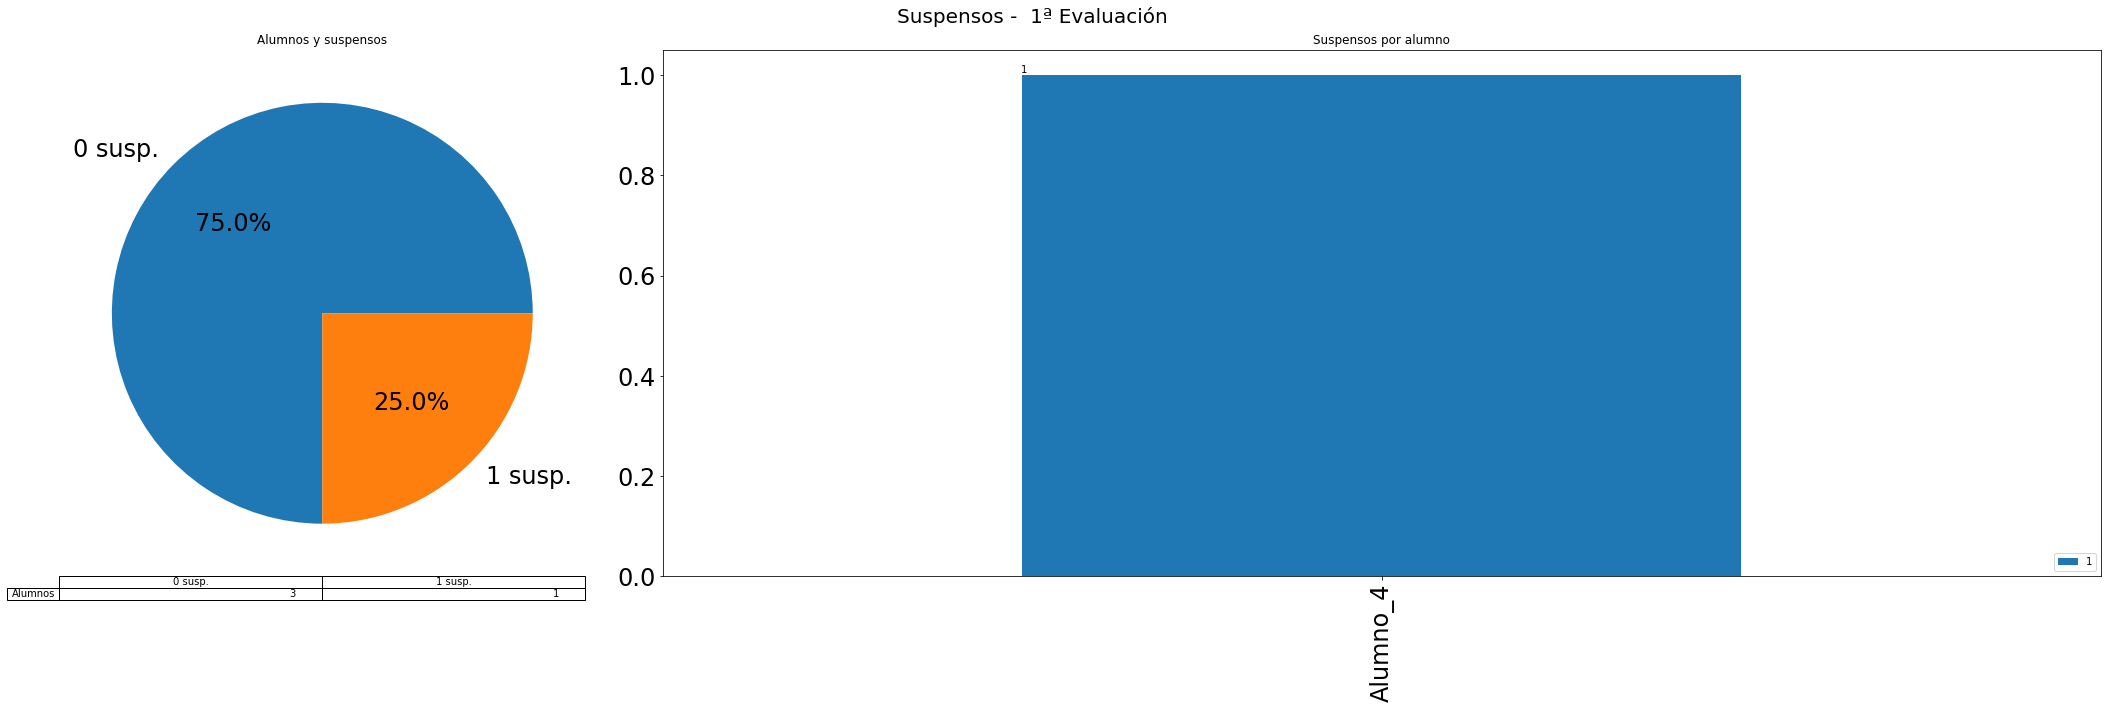

In [39]:
fig = plt.figure(figsize=(30,10))
fig.suptitle('Suspensos -  {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax0 = fig.add_subplot(gs[0, 0])

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']
df2.name = 'Alumnos'

g0=df2[df2>0].plot(kind='pie', title = 'Alumnos y suspensos',ax=ax0, autopct='%1.1f%%', table=True, ylabel="", fontsize=24)

ax1 = fig.add_subplot(gs[0, 1])

df=actilla_final.groupby(['Alumno','Eval'])[['Suspenso']].sum().round(2).rename(columns={'Suspenso':'Suspensos'}).unstack()
df.columns = df.columns.get_level_values(1)
g4=df[df[ultima_evaluacion] > 0].sort_values(ultima_evaluacion, ascending=False).plot.bar(title='Suspensos por alumno',ax=ax1, xlabel="", fontsize=24)
#g4=df.plot.bar(title='Suspensos por alumno', xlabel="", fontsize=18)
for p in g4.patches:
    g4.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
g4.legend(loc='lower right')    

fig.savefig('g3.png'.format(ultima_evaluacion))

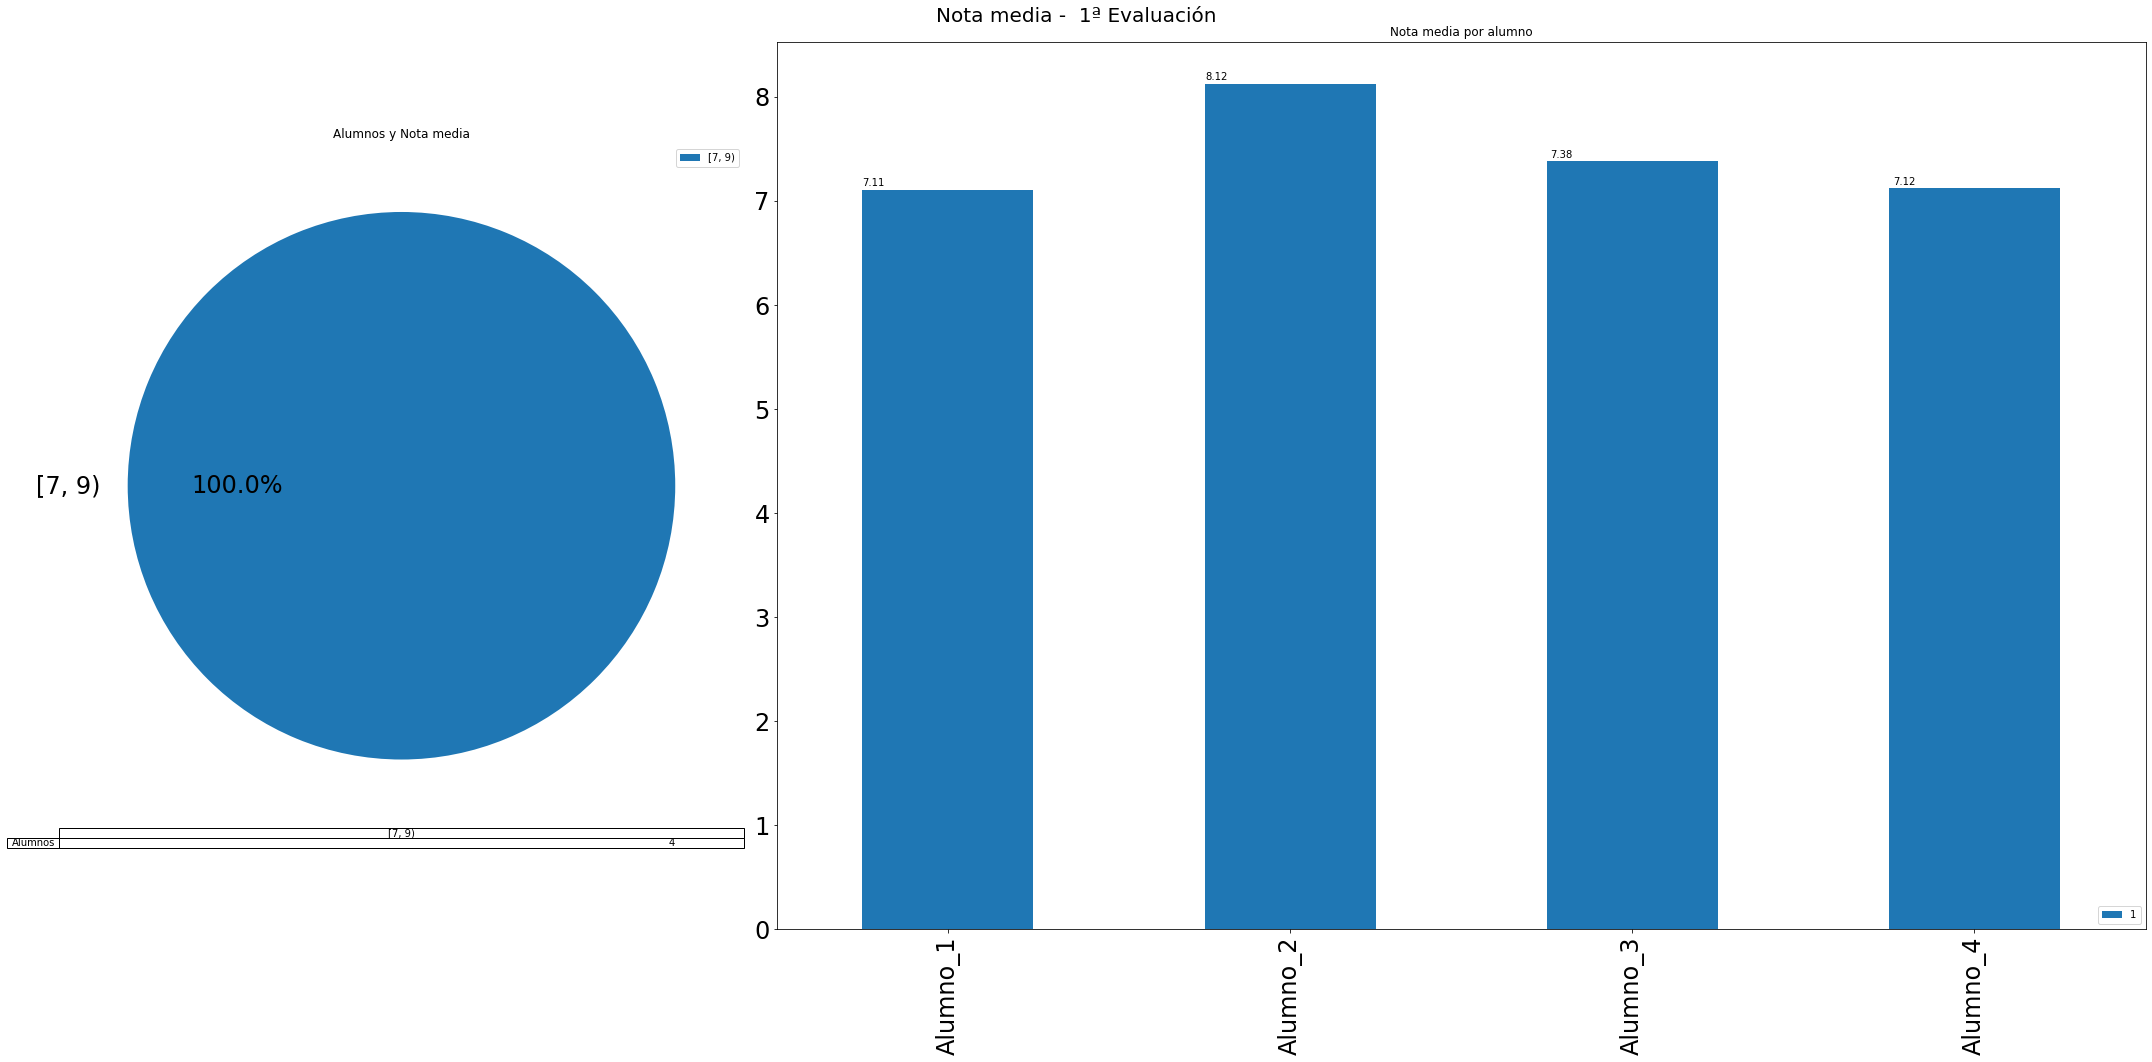

In [40]:
fig = plt.figure(figsize=(30,15))
fig.suptitle('Nota media -  {}ª Evaluación'.format(ultima_evaluacion), fontsize=20)
gs = gridspec.GridSpec(nrows=1, ncols=2, width_ratios=[1, 2])

ax0 = fig.add_subplot(gs[0, 0])

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = "Alumnos"
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ylabel="", fontsize=24)

ax0 = fig.add_subplot(gs[0,1])
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g3=df.plot.bar(title='Nota media por alumno',ax=ax0, xlabel="", fontsize=24)
g3.legend(loc='lower right')
for p in g3.patches:
    g3.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))
   

fig.savefig('g4.png'.format(ultima_evaluacion))

,0 susp.,1 susp.,2 susp.,3 ó 4 susp.,> 4 susp.
Alumnos,3,1,0,0,0


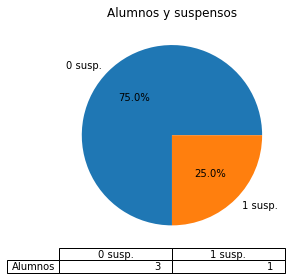

In [41]:
# Alumnos y suspensos

from matplotlib import rcParams
rcParams.update({'figure.autolayout': True})

df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').sum().Suspenso
ranges = [0,1,2,3,5,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.index=['0 susp.','1 susp.','2 susp.','3 ó 4 susp.','> 4 susp.']

df2.name = 'Alumnos'
#df2.name = ultima_evaluacion

g0=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y suspensos',autopct='%1.1f%%', table=True, ylabel="")
g0
g0.get_figure().savefig('g0.png')

# texto += "\n\n### Resumen de suspensos \n"
# texto += "\n \n {} \n".format(df2.to_frame().T.to_markdown())

texto +=analisis_df(df2.to_frame().T.rename({'Alumnos':ultima_evaluacion}),txt_intro="El número de alumnos por suspensos se distribuyen de la siguiente manera: \n", modo=2)[0]
texto += "\n \n Gráficamente: \n \n ![](g3.png) \n \n"

df2.to_frame().T



In [42]:
# Alumno-Asignatura-Suspenso
df = actilla_final[(actilla_final.Eval == ultima_evaluacion) & (actilla_final.Suspenso >= 0)][['Alumno','Asignatura','Suspenso']]

# Alumno-Suspenso
df2=df.groupby('Alumno').sum().sort_values('Suspenso', ascending=False)

# Numero Suspenso - Numero alumnos
df3 = df2
df3['N']=1
df3 = df3.groupby('Suspenso').count().sort_index(ascending=False)

display("Alumnos suspensos: \n")

texto += " \n Alumnos con suspensos: \n"
for i in df3[df3.index> 0].index :
    print(f'Con **{i}** asignatura:')
    texto += "\n* Con **{}** asignaturas: \n".format(i)
    for j in df2[df2.Suspenso == i].sort_values('Alumno').index : 
        print(" ", j,'(', ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values),')')
        texto += "\n    - "+ j+' ('+ ', '.join(df[(df.Alumno == j) & (df.Suspenso > 0)]['Asignatura'].values)+") \n \n"


'Alumnos suspensos: \n'

Con **1** asignatura:
  Alumno_4 ( HE )


Nota,"[0, 3)","[3, 4)","[4, 5)","[5, 6)","[6, 7)","[7, 9)","[9, 10)"
Alumnos,0,0,0,0,0,4,0


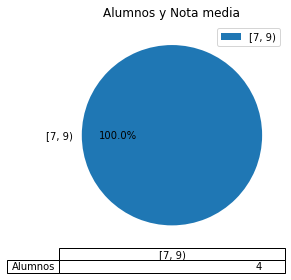

In [43]:
# Alumnos y nota media
df = actilla_final[actilla_final.Eval==ultima_evaluacion].groupby('Alumno').mean().Nota
ranges = [0,3,4,5,6,7,9,10]
df2 = df.groupby(pd.cut(df, ranges, right=False)).count()
df2.name = "Alumnos"
g1=df2[df2 > 0].plot(kind='pie', title = 'Alumnos y Nota media',autopct='%1.1f%%', legend = True, table=True, ylabel="")
g1
g1.get_figure().savefig('g1.png')

# texto += "\n\n### Resumen de nota media \n"
# texto += "\n {} \n".format(df2.to_frame().T.to_markdown())

texto +=analisis_df(df2.to_frame().T.rename({'Alumnos':ultima_evaluacion}),txt_intro="El número de alumnos por nota media se distribuye de la siguiente manera: \n", modo=2)[0]
texto += "\n\n Gráficamente \n \n ![](g4.png) \n \n"

df2.to_frame().T



Eval,1
Alumno,
Alumno_1,7.11
Alumno_2,8.12
Alumno_3,7.38
Alumno_4,7.12


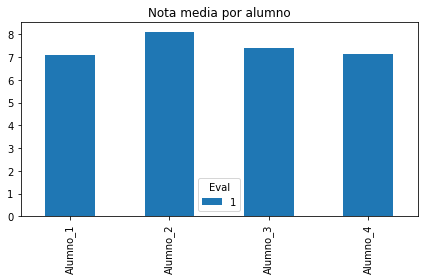

In [44]:
df=actilla_final.groupby(['Alumno','Eval'])[['Nota']].mean().round(2).rename(columns={'Nota':'Media'}).unstack()
df.columns = df.columns.get_level_values(1)
g2=df.plot.bar(title='Nota media por alumno', xlabel ="") 
g2
g2.get_figure().savefig('g2.png')

texto += "\n\n## Resultados por alumno \n\n"
# texto += "\n\n### Notas medias \n\n"
# texto += " {} ".format(df.to_markdown())
# texto += "\n\n ![](g2.png) \n \n"

df

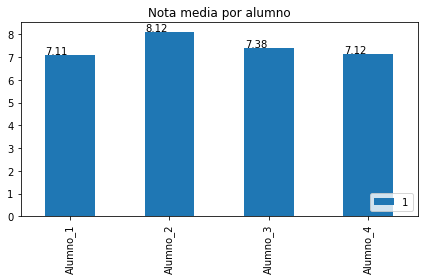

In [45]:
g2 = df.plot(kind='bar', title='Nota media por alumno', xlabel ="")
g2.legend(loc='lower right')

for p in g2.patches:
    g2.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

g2.get_figure().savefig('g2.png')

In [46]:
# Resultados por alumno

observaciones = True # Poner a False si no queremos que aparezcan observaciones

texto3 = texto

df = actilla_final[actilla_final.Eval <= ultima_evaluacion]

#texto += "\n\n### Resultados por alumno \n"
for a in df.groupby('Alumno').nunique().index :
    
    #Resumen de resultados
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].groupby(['Alumno','Eval']).aggregate({'Nota':'mean','Suspenso':'sum'})
    df2.index = df2.index.get_level_values(1)
    df2.Nota = df2.Nota.round(2)
    df2 = df2.rename(columns={'Nota':'Nota media', 'Suspenso':'Número de suspensos'})
    display(analisis_df(df2, "En la {}ªev: \n ".format(ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])
    txt = "\n\n### {} \n".format(a)
    #texto += "\n {} \n".format(analisis_df(df2, " {} en la {}ªev: \n ".format(a,ultima_evaluacion),txt_igual="\n * Mantiene {}")[0])
    txt += "\n * {}".format(analisis_df(df2, "",txt_igual="\n * Mantiene {}", modo=3)[0])
    texto += txt
    texto3 += txt
    
    #Lista de suspensos
    df2 = df[(df.Alumno==a) & (df.Suspenso==1) & (df.Eval == ultima_evaluacion)][['Asignatura','Eval','Suspenso']]
    if len(df2[['Asignatura']].values) > 0 : 
        #txt="* Suspende {} asignaturas: ".format(len(df2[['Asignatura']].values)) + ", ".join([i[0] for i in df2[['Asignatura']].values])
        txt="* Suspensos: " + ", ".join([i[0] for i in df2[['Asignatura']].values])
        texto += "\n\n{} \n".format(txt)
        texto3 += "\n\n{} \n".format(txt)
        print(txt) 

    
    #Análisis de las notas
    df2 = df[(df.Alumno == a) & (df.Eval <= ultima_evaluacion)].iloc[:,1:-1].groupby(['Asignatura','Eval']).min().unstack('Asignatura')
    df2.columns = df2.columns.get_level_values(1)
    display(df2)
    display(analisis_df(df2, "Resultados: \n ", "Sube en {}:", "Baja en {}:", "En {}:", solo_diferencias=True)[0])
    texto += "\n{}\n".format(df2.to_markdown())
    txt =  analisis_df(df2, "\n\n * Resultados: ", "Sube en {}:", "**Baja** en {}:", "En {}:", solo_diferencias=True, modo=3)[0]
    texto +=  txt
    texto3 += txt
    
    if (observaciones & obser.Observaciones[obser.Alumno == a].count() > 0) : 
        display(obser.Observaciones[obser.Alumno == a].values[0])
        txt =  "\n\n * Observaciones: {}".format(obser.Observaciones[obser.Alumno == a].values[0])
        texto += txt
        texto3 += txt
texto = texto.replace('|--','|:-').replace('--|','-:|')
f.write(texto)
f.close()

f3.write(texto3)
f3.close()



pypandoc.convert_file("acta_{}ev.md".format(ultima_evaluacion),'pdf',outputfile='acta_{}ev.pdf'.format(ultima_evaluacion),extra_args=['--template=template_acta.latex'])
pypandoc.convert_file("acta2_{}ev.md".format(ultima_evaluacion),'docx',outputfile='acta_{}ev.docx'.format(ultima_evaluacion))

'En la 1ªev: \n **Nota media** es 7.11, **Número de suspensos** es 0 \n '

Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,PSC,QU
Eval,,,,,,,,,
1,8,7,7,5,10,6,7,8,6


'Resultados: \n **2FR II** es 8, **BI** es 7, **CTM** es 7, **HE** es 5, **IN II** es 10, **LC2** es 6, **MA2** es 7, **PSC** es 8, **QU** es 6 \n '

'Aquí irían las observaciones del alumno 1'

'En la 1ªev: \n **Nota media** es 8.12, **Número de suspensos** es 0 \n '

Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,QU
Eval,,,,,,,,
1,7,8,9,7,9,7,9,9


'Resultados: \n **2FR II** es 7, **BI** es 8, **CTM** es 9, **HE** es 7, **IN II** es 9, **LC2** es 7, **MA2** es 9, **QU** es 9 \n '

'Aquí irían las observaciones del alumno 2'

'En la 1ªev: \n **Nota media** es 7.38, **Número de suspensos** es 0 \n '

Asignatura,2FR II,BI,CTM,HE,IN II,LC2,MA2,QU
Eval,,,,,,,,
1,8,7,9,6,9,7,7,6


'Resultados: \n **2FR II** es 8, **BI** es 7, **CTM** es 9, **HE** es 6, **IN II** es 9, **LC2** es 7, **MA2** es 7, **QU** es 6 \n '

'Aquí irían las observaciones del alumno 3'

'En la 1ªev: \n **Nota media** es 7.12, **Número de suspensos** es 1 \n '

* Suspensos: HE


Asignatura,BI,CTM,HE,IN II,LC2,MA2,PS,QU
Eval,,,,,,,,
1,7,8,3,7,7,10,8,7


'Resultados: \n **BI** es 7, **CTM** es 8, **HE** es 3, **IN II** es 7, **LC2** es 7, **MA2** es 10, **PS** es 8, **QU** es 7 \n '

'Aquí irían las observaciones del alumno 4'

''